<a href="https://colab.research.google.com/github/huynhngoctuongvi811/DO_AN_2/blob/main/%C4%90%E1%BB%92_%C3%81N_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài toán dự đoán doanh số bán hàng trong tương lai từ dữ liệu lịch sử giao dịch của nhà bán lẻ trực tuyến

# Bài toán dự đoán doanh số bán hàng trong tương lai từ dữ liệu lịch sử giao dịch của nhà bán lẻ trực tuyến

GVHD: LÊ HẰNG ANH

NHÓM SINH VIÊN THỰC HIỆN:
- LÊ ĐÌNH TÙNG
- NGUYỄN THỊ THUYÊN
- HUỲNH NGỌC TƯỜNG VI

## 1.Định nghĩa bài toán

### 1.1.Mục tiêu

Mục tiêu của nghiên cứu này là xây dựng một mô hình dự báo doanh số bán hàng trong tương lai dựa trên dữ liệu lịch sử giao dịch của nhà bán lẻ trực tuyến.
- Cung cấp ước lượng chính xác về doanh thu tương lai ở các mốc thời gian cụ thể.
- Hỗ trợ nhà quản lý trong việc lập kế hoạch tồn kho, định giá, quảng bá và phân phối nguồn lực hiệu quả hơn.
- Khai thác tiềm năng dữ liệu lớn trong thương mại điện tử nhằm tối ưu hóa các quyết định chiến lược và vận hành.

### 1.2.Bối cảnh kinh doanh

Trong bối cảnh thị trường thương mại điện tử tăng trưởng nhanh chóng, các doanh nghiệp bán lẻ đối mặt với thách thức trong việc duy trì chuỗi cung ứng hiệu quả và đáp ứng đúng nhu cầu thị trường. Dự đoán doanh số không chỉ giúp cân đối cung-cầu mà còn là cơ sở để tối ưu hóa chi phí, giảm thiểu rủi ro hàng tồn kho và nắm bắt cơ hội kinh doanh.

### 1.3.Giải pháp

Vấn đề hiện tại: Trong bối cảnh thương mại điện tử đang phát triển nhanh chóng, các nhà bán lẻ trực tuyến đối mặt với áp lực ngày càng lớn trong việc tối ưu hóa hoạt động kinh doanh, đặc biệt là việc dự báo nhu cầu và doanh số bán hàng. Việc dự báo không chính xác có thể dẫn đến mất cân bằng cung cầu: tồn kho quá mức gây lãng phí tài nguyên, trong khi thiếu hàng lại làm giảm trải nghiệm khách hàng và mất cơ hội doanh thu.

Chi phí liên quan: Theo báo cáo của McKinsey & Company, các công ty không có khả năng dự báo chính xác doanh số có thể bị thiệt hại lên đến 10-20% doanh thu hàng năm do các quyết định sai lệch về hàng tồn kho, chiến dịch marketing và phân phối nguồn lực. Trong khi đó, khả năng dự đoán chính xác có thể giúp cải thiện dòng tiền, giảm thiểu chi phí tồn kho và tăng mức độ hài lòng của khách hàng.

Tầm quan trọng: Một nghiên cứu của Gartner cho thấy rằng các doanh nghiệp bán lẻ có khả năng dự báo chính xác có thể cải thiện lợi nhuận hoạt động lên đến 20%. Ngoài ra, trong thời đại dữ liệu lớn, việc tận dụng dữ liệu giao dịch lịch sử để huấn luyện các mô hình học máy không chỉ nâng cao độ chính xác của dự báo mà còn giúp phát hiện những yếu tố ẩn sau ảnh hưởng đến hành vi mua hàng, từ đó đưa ra các chiến lược kinh doanh linh hoạt và hiệu quả hơn.

## 2.Các thư viện cần thiết

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:00


In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import pickle
import os
import matplotlib.dates as mdates

In [ ]:
# Thư viện cho tiền xử lý dữ liệu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Thư viện cho feature selection và engineering
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA

In [ ]:
# Thư viện để xử lý imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Thư viện cho đánh giá mô hình
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, precision_recall_curve, auc)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Thư viện cho model interpretation
import shap
from sklearn.inspection import permutation_importance
from sklearn.tree import export_graphviz
import matplotlib.cm as cm

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression



## 3.Thu thập và khám phá dữ liệu

### 3.1.Tải và kiểm tra dữ liệu ban đầu

In [ ]:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
df_ = pd.concat([df1, df2], ignore_index= True)
print(f"Dữ liệu đã được tải với {df_.shape[0]} dòng và {df_.shape[1]} cột.")

Dữ liệu đã được tải với 1067371 dòng và 8 cột.


In [ ]:
# IN ra ngẫu nhiên 5 mẫu
df_.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
455142,532626,22865,HAND WARMER OWL DESIGN,12,2010-11-12 15:33:00,2.10,12779.0,Poland
397261,527418,21984,PACK OF 12 PINK PAISLEY TISSUES,48,2010-10-17 15:40:00,0.25,16684.0,United Kingdom
217019,510445,22156,HEART DECORATION WITH PEARLS,3,2010-05-30 15:58:00,0.85,18069.0,United Kingdom
438879,531352,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2010-11-07 13:45:00,0.55,13137.0,United Kingdom
631463,545303,22920,HERB MARKER BASIL,12,2011-03-01 12:48:00,0.65,15319.0,United Kingdom


In [ ]:
# Thông tin cơ bản
print("===== THÔNG TIN CƠ BẢN =====")
print(df_.info())

===== THÔNG TIN CƠ BẢN =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


Nhận xét


### 3.2.Kiểm tra chất lượng dữ liệu

In [ ]:
# Kiểm tra giá trị thiếu
print("===== KIỂM TRA GIÁ TRỊ THIẾU =====")
missing_values = df_.isnull().sum()
missing_percent = (missing_values / len(df_)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Số lượng', 'Phần trăm (%)']
print(missing_data[missing_data['Số lượng'] > 0])

===== KIỂM TRA GIÁ TRỊ THIẾU =====
             Số lượng  Phần trăm (%)
Description      4382       0.410541
Customer ID    243007      22.766873


Bộ dữ liệu không có giá trị thiếu

In [ ]:
print("===== THỐNG KÊ MÔ TẢ CHO BIẾN SỐ =====")
# Loại bỏ cột Customer ID nếu tồn tại
if 'Customer ID' in df_.columns:
    df_numeric = df_.drop(columns=['Customer ID'])
else:
    df_numeric = df_

# Lọc các cột số và thống kê mô tả
numeric_cols = df_numeric.select_dtypes(include=['int64', 'float64']).columns
print(df_numeric[numeric_cols].describe())

===== THỐNG KÊ MÔ TẢ CHO BIẾN SỐ =====
           Quantity         Price
count  1.067371e+06  1.067371e+06
mean   9.938898e+00  4.649388e+00
std    1.727058e+02  1.235531e+02
min   -8.099500e+04 -5.359436e+04
25%    1.000000e+00  1.250000e+00
50%    3.000000e+00  2.100000e+00
75%    1.000000e+01  4.150000e+00
max    8.099500e+04  3.897000e+04


In [ ]:
# Kiểm tra giá trị trùng lặp
duplicate_rows = df_[df_.duplicated(keep=False)]
print("===== GIÁ TRỊ TRÙNG LẶP =====")
print(duplicate_rows)
print(f"Tổng số dòng trùng lặp: {df_.duplicated().sum()}")


===== GIÁ TRỊ TRÙNG LẶP =====
        Invoice StockCode                        Description  Quantity  \
362      489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES         1   
363      489517     21912           VINTAGE SNAKES & LADDERS         1   
365      489517     21821   GLITTER STAR GARLAND WITH BELLS          1   
367      489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED        12   
368      489517     22130   PARTY CONE CHRISTMAS DECORATION          6   
...         ...       ...                                ...       ...   
1067136  581538     22068        BLACK PIRATE TREASURE CHEST         1   
1067150  581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
1067153  581538     22992             REVOLVER WOODEN RULER          1   
1067160  581538     22694                       WICKER STAR          1   
1067162  581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

                InvoiceDate  Price  Customer ID         Country  
362     2009-12

In [ ]:
# Kiểm tra dữ liệu không hợp lệ
df_[df_['Quantity'] <= 0]
df_[df_['Price'] <= 0]
df_['Invoice'].str.startswith('C').sum()

19494

In [ ]:
# Kiểm tra phân bố theo thời gian
df_['InvoiceDate'].min(), df_['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

## 4.Tiền xử lý dữ liệu

### 4.1.Xử lý các vấn đề tồn đọng

In [ ]:
# Tạo bản sao để tránh thay đổi dữ liệu gốc
df = df_.copy()

In [ ]:
# Chuyển đổi InvoiceDate về dạng y-m-d h-m-s
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter out data for December 2009 and December 2011
df = df[~((df['InvoiceDate'].dt.year == 2009) & (df['InvoiceDate'].dt.month == 12))]
df = df[~((df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month == 12))]


In [ ]:
# Xử lý cột Customer ID - do dự đoán theo đơn hàng, không quan tâm ai mua
for col in ['Customer ID']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [ ]:
# Replace missing values in the 'Description' column with 'Unknown'
if 'Description' in df.columns:
    df['Description'].fillna('Unknown', inplace=True)


<ipython-input-26-558e35d213fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)


In [ ]:
# Kiểm tra giá trị NaN sau khi chuyển đổi
print(f"Số giá trị NaN trong InvoiceDate: {df['InvoiceDate'].isna().sum()}")


Số giá trị NaN trong InvoiceDate: 0


In [ ]:
# Sử dụng IQR tìm ngưỡng ngoại lệ
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Thay giá trị ngoại lệ bằng ngưỡng
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


# Xử lý dữ liệu
def retail_data_prep(dataframe):
    # dataframe.dropna(inplace=True)      # Xóa  giá trị thiếu
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]    # Loại bỏ các sản phẩm bị hủy
    dataframe = dataframe[dataframe["Quantity"] > 0]      # Số lượng > 0
    dataframe = dataframe[dataframe["Price"] > 0]         # Doanh thu > 0
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe
df = retail_data_prep(df)

<ipython-input-28-27a6e7845fc8>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-147.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [ ]:
# Kiểm tra lại giá trị thiếu
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Country,0


In [ ]:
# Thống kê mô tả lại cho các biến số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe()

,Quantity,Price
count,972601.000000,972601.000000
mean,9.725575,3.399731
std,22.310686,4.069889
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,12.000000,4.130000
max,248.500000,44.565000


### 4.2.Tạo các đặc trưng mới

In [ ]:
# Tạo biến 'Date': chỉ lấy phần ngày (loại bỏ giờ, phút, giây)
df['Date'] = df['InvoiceDate'].dt.floor('D')

# Tạo biến 'Month': chuyển đổi thành định dạng tháng (Period)
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Month_int'] = df['InvoiceDate'].dt.month #

# Quý trong năm (1-4)
df['Quarter'] = df['InvoiceDate'].dt.quarter

# các năm
df['Year'] = df['InvoiceDate'].dt.year
# Tạo biến 'DayofWeek': lấy tên ngày trong tuần
df['DayofWeek'] = df['InvoiceDate'].dt.day_name()

# Tạo biến 'Hour': lấy giờ trong ngày (0 đến 23)
df['Hour'] = df['InvoiceDate'].dt.hour

# tính tổng doanh số
df['TotalAmount']=df['Quantity']*df['Price']


In [ ]:
df.sample()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Date,Month,Month_int,Quarter,Year,DayofWeek,Hour,TotalAmount
923957,571243,23348,CHILDRENS TOY COOKING UTENSIL SET,6.0,2011-10-14 15:26:00,2.08,United Kingdom,2011-10-14,2011-10,10,4,2011,Friday,15,12.48


## 5.EDA - Phân tích khám phá dữ liệu

### 5.1.Phân tích doanh số theo ngày

In [ ]:
import plotly.graph_objects as go

# Nhóm theo ngày, tính tổng số lượng bán
daily_sales = df.groupby('Date')['Quantity'].sum()

# Lấy ngày có số lượng bán ra cao nhất
top_day = daily_sales.nlargest(1)

# Tạo biểu đồ tương tác
fig = go.Figure()

# Vẽ biểu đồ đường cho số lượng bán ra theo ngày
fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines+markers', name='Số lượng bán ra theo ngày'))

# Thêm điểm cao nhất vào biểu đồ
for date, sales in top_day.items():
    date_str = date.strftime('%Y-%m-%d')  # Chuyển đổi ngày sang định dạng chuỗi
    fig.add_trace(go.Scatter(
        x=[date], y=[sales],
        mode='markers+text',
        textposition='top center',
        marker=dict(color='red', size=10),
        name=f'Đỉnh cao nhất ({date_str})'
    ))

# Cập nhật layout của biểu đồ
fig.update_layout(
    title='Tổng số lượng sản phẩm bán ra theo ngày (Điểm cao nhất)',
    xaxis_title='Ngày',
    yaxis_title='Số lượng bán ra',
    template='plotly_white',
    hovermode='closest'
)

# Hiển thị biểu đồ
fig.show()


+ Xu hướng chung tăng dần theo thời gian

 - Từ đầu năm 2010 đến cuối năm 2011, mức độ biên động của doanh số ngày càng lớn, với nhiều đỉnh và đáy rõ rệt. Điều này cho thấy quy mô thị trường và khối lượng giao dịch có xu hướng gia tăng, có thể do sự mở rộng khách hàng, quảng bá thương hiệu hay các chiến dịch khuyến mãi.

+ Tính mùa vụ (seasonality)
  - Đa số các ngọn đỉnh cao nhất tập trung vào các tháng cuối năm (cuối quý 3, quý 4), đặc biệt quanh tháng 9–12 của năm 2010 và 2011. Ví dụ:

  - Ngày 2 tháng 12 2010 và 1 tháng 12 2010 là hai ngày có doanh số lớn nhất, có thể liên quan đến các chương trình khuyến mãi mùa đông hoặc chuẩn bị cho lễ Giáng Sinh.

  - Ngày 27 tháng 9 2010 và 8 tháng 12 2010 cũng nằm trong nhóm “đỉnh” cuối năm, càng khẳng định mùa cao điểm mua sắm rơi vào thời gian này.

+ Các điểm bất thường (outliers)
  - Một vài ngày giữa năm cũng có đột biến (ví dụ ngày 27 tháng 9 2010 hay ngày 10 tháng 10 2010), có thể do chiến dịch marketing đặc biệt, sự kiện flash sale hoặc đơn hàng lớn bị gộp vào một ngày.

+ Biên độ dao động lớn
  - Cột “Số lượng bán ra theo ngày” có khuynh hướng từ khoảng 5 000–10 000 mặt hàng/ngày ở giai đoạn đầu 2010, đến trên 20 000–30 000/ngày vào cuối 2011. Biên độ và tần suất các đỉnh càng dày đặc cho thấy hoạt động kinh doanh ngày càng sôi động.

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Date,Month,Month_int,Quarter,Year,DayofWeek,Hour,TotalAmount
45228,493410,TEST001,This is a test product.,5.0,2010-01-04 09:24:00,4.50,United Kingdom,2010-01-04,2010-01,1,1,2010,Monday,9,22.50
45230,493412,TEST001,This is a test product.,5.0,2010-01-04 09:53:00,4.50,United Kingdom,2010-01-04,2010-01,1,1,2010,Monday,9,22.50
45231,493413,21724,PANDA AND BUNNIES STICKER SHEET,1.0,2010-01-04 09:54:00,0.85,United Kingdom,2010-01-04,2010-01,1,1,2010,Monday,9,0.85
45232,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1.0,2010-01-04 09:54:00,3.75,United Kingdom,2010-01-04,2010-01,1,1,2010,Monday,9,3.75
45233,493413,21723,ALPHABET HEARTS STICKER SHEET,1.0,2010-01-04 09:54:00,0.85,United Kingdom,2010-01-04,2010-01,1,1,2010,Monday,9,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041825,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4.0,2011-11-30 17:37:00,1.25,United Kingdom,2011-11-30,2011-11,11,4,2011,Wednesday,17,5.00
1041826,579885,21742,LARGE ROUND WICKER PLATTER,2.0,2011-11-30 17:37:00,5.95,United Kingdom,2011-11-30,2011-11,11,4,2011,Wednesday,17,11.90
1041827,579885,23084,RABBIT NIGHT LIGHT,6.0,2011-11-30 17:37:00,2.08,United Kingdom,2011-11-30,2011-11,11,4,2011,Wednesday,17,12.48
1041828,579885,21257,VICTORIAN SEWING BOX MEDIUM,1.0,2011-11-30 17:37:00,7.95,United Kingdom,2011-11-30,2011-11,11,4,2011,Wednesday,17,7.95


### 5.2.phân tích doanh số theo thời gian

<ipython-input-29-0567a88f2ffa>:8: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



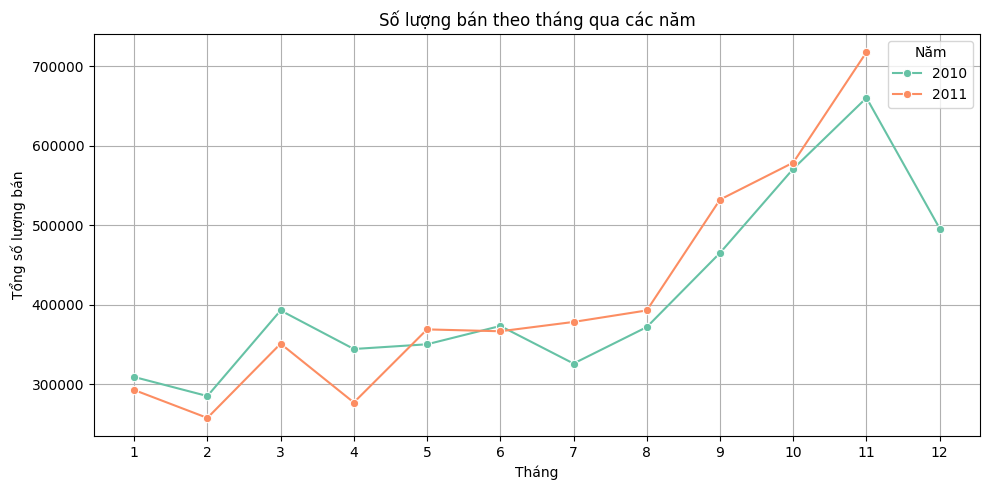

In [ ]:
# Tổng doanh số theo tháng của từng năm
monthly_sales_amount = df.groupby(['Year', 'Month_int'])['TotalAmount'].sum().reset_index()
monthly_sales_quantity = df.groupby(['Year', 'Month_int'])['Quantity'].sum().reset_index()

# Chọn bảng màu (ở đây chọn palette Set2)
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_sales_quantity,x='Month_int', y='Quantity', hue='Year', marker='o',palette=custom_palette)

plt.title('Số lượng bán theo tháng qua các năm')
plt.xlabel('Tháng')
plt.ylabel('Tổng số lượng bán')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Năm')
plt.tight_layout()
plt.show()


1. Giai đoạn ổn định ban đầu (01/2010 – 04/2010):
- Số lượng bán dao động nhẹ, nằm trong khoảng 280,000 – 300,000 đơn vị.
- Giai đoạn này thể hiện mức tiêu thụ ổn định, không có đột biến đáng kể. Có thể đây là giai đoạn chưa có chiến dịch tiếp thị lớn, hoặc đang trong mùa thấp điểm.
2. Giai đoạn dao động nhẹ và phục hồi (05/2010 – 08/2010):
- Tháng 5/2010 ghi nhận mức tăng nhẹ (~ 350,000), sau đó tiếp tục tăng đến khoảng 370,000 vào tháng 6, rồi giảm xuống mức thấp hơn vào tháng 7 (~320,000).- Sự dao động này gợi ý tính chu kỳ hoặc ảnh hưởng của các chiến dịch bán hàng ngắn hạn (ví dụ: khuyến mãi mùa hè), nhưng chưa có xu hướng rõ ràng.

3. Giai đoạn tăng trưởng mạnh (09/2010 – 11/2010):
- Tháng 9–11/2010 chứng kiến một sự gia tăng rõ rệt, từ ~460,000 lên ~600,000 đơn vị trong 3 tháng liên tiếp.
- Đây là điểm bùng nổ doanh số, có thể do các chương trình khuyến mãi lớn, nhu cầu mua sắm cao dịp cuối năm hoặc sự ra mắt sản phẩm mới.
- Đây là mùa cao điểm đầu tiên trong chuỗi thời gian.
4. Sự suy giảm sau cao điểm (12/2010 – 02/2011):
- Tháng 12/2010 và đầu năm 2011 chứng kiến sự giảm mạnh về lượng bán (~430,000 vào tháng 12, xuống khoảng 260,000 vào tháng 2/2011).
- Đây có thể là hiệu ứng tất yếu sau mùa cao điểm, đồng thời phản ánh tính mùa vụ thường thấy: sau dịp lễ người tiêu dùng chi tiêu ít lại.
5. Phục hồi và ổn định giữa năm (03/2011 – 08/2011):
- Từ tháng 3 đến tháng 8/2011, lượng bán dao động từ 330,000 đến 380,000 đơn vị.
- Mặc dù không tăng đột biến, nhưng duy trì mức tiêu thụ ổn định cho thấy thị trường đã phục hồi và chuẩn bị bước vào mùa cao điểm tiếp theo.
6. Tăng trưởng đột phá lần thứ hai (09/2011 – 11/2011):
- Tăng vọt từ ~520,000 vào tháng 9 lên tới đỉnh 640,000 vào tháng 11/2011.
- Đáng chú ý là mức tăng trưởng này mạnh hơn và sớm hơn so với cùng kỳ năm 2010, cho thấy năm 2011 đã đạt được kết quả kinh doanh vượt trội.
- Điều này phản ánh sự cải thiện trong chiến lược bán hàng, năng lực cung ứng hoặc sự mở rộng thị trường.

=> Kết luận:
- Cần định kỳ hóa các chiến dịch khuyến mãi vào (tháng 9–11), vì đây là giai đoạn có tiềm năng bán hàng cao nhất mỗi năm.

- Tạo các chương trình giữ chân khách hàng sau dịp lễ, đặc biệt trong tháng 12 và các tháng đầu năm sau – nơi mức tiêu thụ sụt giảm mạnh.

- Năm 2011 có xu hướng tăng trưởng tốt hơn năm 2010, cho thấy các điều chỉnh chiến lược trong năm này có hiệu quả – cần phân tích sâu yếu tố thành công để nhân rộng.

- Tối ưu tồn kho & cung ứng từ tháng 8 để chuẩn bị cho nhu cầu cao từ tháng 9 trở đi.

<ipython-input-30-39ce9d057650>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




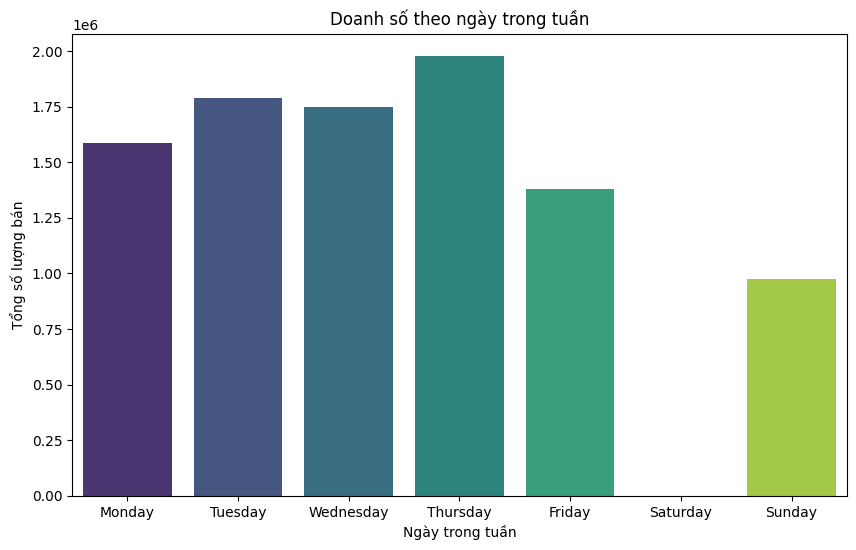

In [ ]:
# Doanh số theo ngày trong tuần
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = df.groupby('DayofWeek')['Quantity'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Tổng số lượng bán')
plt.title('Doanh số theo ngày trong tuần')
plt.show()

### 5.3.phân tích doanh số theo sản phẩm

<ipython-input-31-9770127f59ae>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




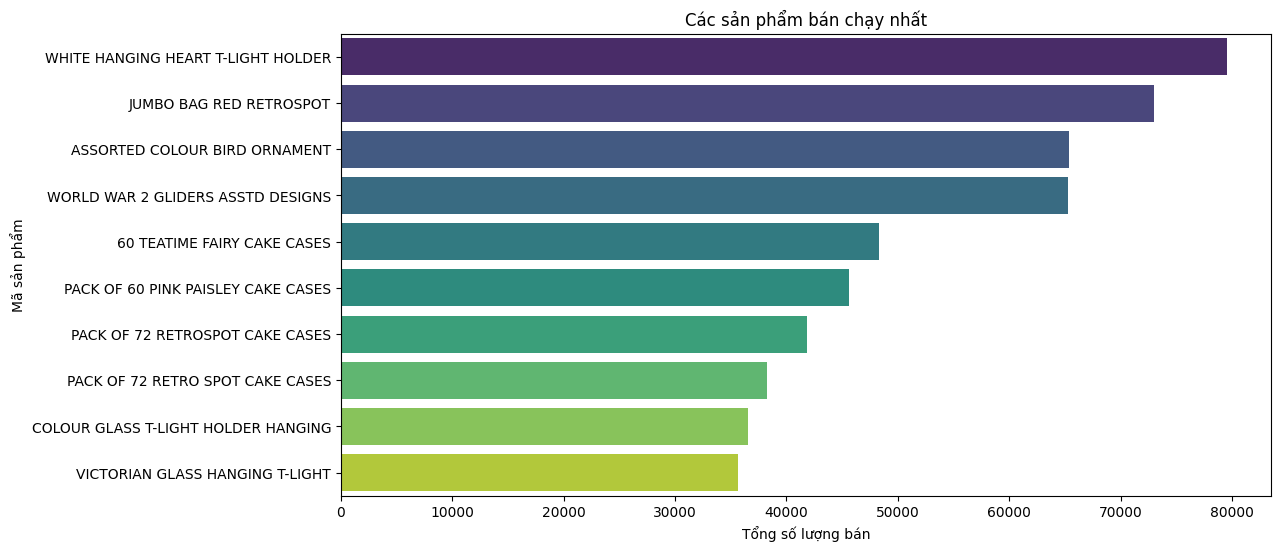

In [ ]:
# Sản phẩm bán chạy nhất
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')

# Đặt tên tiêu đề và nhãn trục x, y
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Mã sản phẩm')
plt.title('Các sản phẩm bán chạy nhất')

plt.show()

Biểu đồ thể hiện top 10 sản phẩm bán chạy nhất của nhà bán lẻ trực tuyến theo tổng số lượng bán ra. Phân tích mô tả sản phẩm cho thấy phần lớn các mặt hàng thuộc về hai nhóm chính: đồ trang trí và dụng cụ làm bánh.

- Nhóm đồ trang trí gồm các sản phẩm như WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT và COLOUR GLASS T-LIGHT HOLDER HANGING. Các sản phẩm này thường mang yếu tố thẩm mỹ, được thiết kế để trang trí nhà cửa, không gian tiệc hoặc làm quà tặng. Việc các sản phẩm này xuất hiện nhiều trong danh sách bán chạy cho thấy xu hướng tiêu dùng thiên về nhu cầu làm đẹp không gian sống, đặc biệt trong các dịp lễ, tiệc tại gia.

- Nhóm thứ hai là dụng cụ làm bánh, với các sản phẩm như PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES, 60 TEATIME FAIRY CAKE CASES. Đây là các mặt hàng giá trị nhỏ, tiêu hao theo lần sử dụng và thường được mua theo lô. Sự xuất hiện của nhóm này phản ánh hành vi tiêu dùng hướng đến tổ chức tiệc tại nhà, nấu nướng cá nhân hoặc kinh doanh hộ gia đình nhỏ lẻ.

- Ngoài ra, một số sản phẩm thuộc các nhóm riêng lẻ như túi đựng (JUMBO BAG RED RETROSPOT) và bộ đồ thủ công (MINI PAINT SET VINTAGE) cho thấy có sự hiện diện của các mặt hàng phục vụ sinh hoạt và giải trí nhẹ nhàng. Sự đa dạng của các nhóm sản phẩm trong top bán chạy, tuy nhiên, vẫn xoay quanh nhu cầu cá nhân hóa không gian sống và hoạt động thủ công mang tính cá nhân.

- Tóm lại, biểu đồ cho thấy khách hàng tập trung vào các sản phẩm nhỏ, giá trị thấp, mang tính thẩm mỹ và tiện lợi cao. Nhóm đối tượng mục tiêu có thể là phụ nữ, gia đình trẻ, hoặc các cá nhân yêu thích trang trí và hoạt động thủ công tại nhà. Đây là những insight quan trọng có thể định hướng chiến lược tiếp thị và quản lý hàng tồn kho trong các giai đoạn cao điểm nhu cầu như lễ hội, mùa cưới, hoặc Giáng sinh.

### 5.5.phân tích doanh số theo quốc gia

<ipython-input-32-f8fb2b3a4c9b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




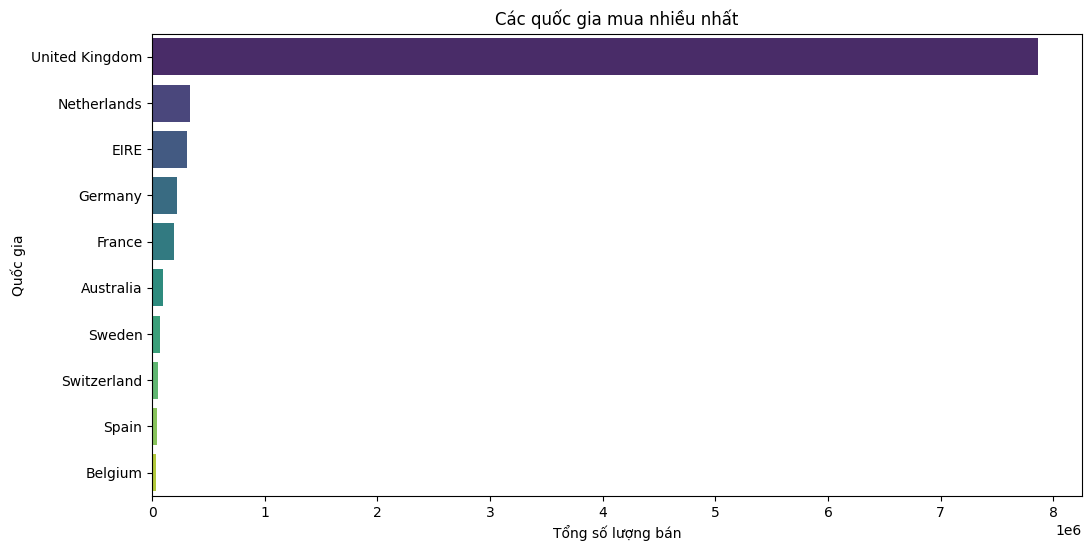

In [ ]:
# Các quốc gia có doanh số bán hàng cao nhất ngoại trừ United Kingdom
top_countries =df.groupby('Country')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Đặt tên tiêu đề và nhãn trục x, y
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Quốc gia')
plt.title('Các quốc gia mua nhiều nhất')
plt.show()

- Doanh thu từ UK vượt trội, cao hơn nhiều lần so với các quốc gia khác, chiếm phần lớn doanh thu trong bộ dữ liệu.
- Điều này cho thấy công ty có thị trường chủ yếu tại Anh, có thể do cơ sở hoạt động chính đặt tại đây, hoặc khách hàng trong nước chiếm ưu thế.
- Netherlands và EIRE có doanh thu tương đối cao sau UK, cho thấy đây có thể là thị trường phụ nhưng vẫn đóng vai trò quan trọng.
- Nếu doanh nghiệp muốn mở rộng kinh doanh, hai thị trường này có thể là điểm nhắm tiếp theo.
- Số lượng đơn hàng có thể thấp nhưng giá trị đơn hàng cao, tức là khách hàng tại đây thích mua hàng cao cấp hơn số lượng lớn.
- Có thể doanh nghiệp chưa khai thác hết thị trường này, nên quảng bá thương hiệu và tối ưu hóa chiến lược tiếp thị có thể thúc đẩy doanh thu.
- Nhật Bản & Tây Ban Nha có doanh thu thấp, có thể do: Ít nhận diện thương hiệu tại khu vực này. Chi phí vận chuyển cao, khiến khách hàng ít đặt hàng hơn. Sản phẩm chưa phù hợp với nhu cầu tiêu dùng tại đây.



### 5.6.phân tích tương quan

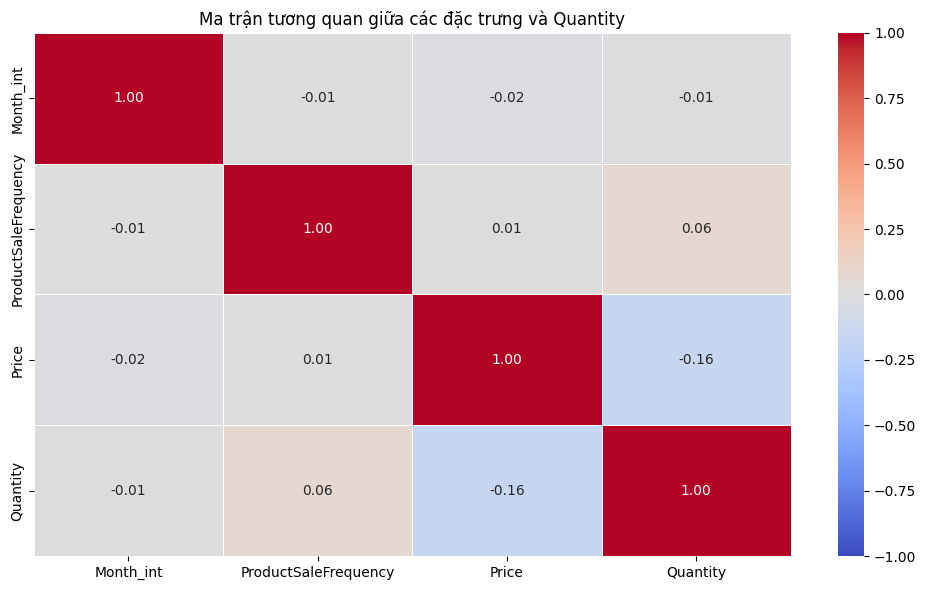

In [ ]:
# 1. Giá trung bình của mỗi sản phẩm (StockCode)
df['ProductAvgPrice'] = df.groupby('StockCode')['Price'].transform('mean')

# 2. Tần suất sản phẩm được bán (số dòng sản phẩm xuất hiện)
df['ProductSaleFrequency'] = df.groupby('StockCode')['Quantity'].transform('count')

# 3. Số lần khách hàng mua hàng (số hóa đơn xuất hiện)
# df['CustomerOrderCount'] = df.groupby('Customer ID')['Invoice'].transform('count')
# Chọn các đặc trưng để phân tích tương quan
features = [
    'Month_int',
    'ProductSaleFrequency',
    # 'CustomerOrderCount',
    'Price',
    'Quantity'      # Biến mục tiêu
]

# 3. Tính ma trận tương quan Pearson
corr_matrix = df[features].corr()

# 4. Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,      # Hiển thị hệ số tương quan trên ô
    fmt='.2f',       # 2 chữ số thập phân
    cmap='coolwarm', # Bản đồ màu
    vmin=-1, vmax=1, # Giới hạn màu từ -1 đến +1
    linewidths=0.5   # Gạch kẻ ngăn cách các ô
)
plt.title('Ma trận tương quan giữa các đặc trưng và Quantity')
plt.tight_layout()
plt.show()

- Giá bán (Price) có hệ số tương quan âm nhẹ với Quantity (≈ –0.16). Điều này cho thấy khi giá sản phẩm tăng lên, số lượng bán giảm đi đôi chút, phù hợp với nguyên lý nêu trong kinh tế học về cầu giảm khi giá tăng. Tuy nhiên, độ mạnh của mối quan hệ vẫn ở mức rất yếu.

- Tần suất bán của sản phẩm (ProductSaleFrequency) thể hiện tương quan dương rất nhỏ (≈ +0.04) với số lượng bán. Mặc dù sản phẩm xuất hiện nhiều lần trong dữ liệu (tần suất cao) có khuynh hướng bán được nhiều hơn, nhưng tác động của đặc trưng này đến biến mục tiêu vẫn là không đáng kể.

- Số đơn hàng của khách hàng (CustomerOrderCount) và chỉ số tháng trong năm (Month_int) đều cho hệ số tương quan xấp xỉ 0 (±0.02), gần như không có mối liên hệ tuyến tính với Quantity. Điều này ngụ ý rằng, ở cấp độ mẫu quan sát hiện tại, các nhân tố nhân khẩu học đơn giản hoặc mùa vụ (theo tháng) chưa thể giải thích sự biến động số lượng bán hàng.

### 5.7.Một số phát hiện từ EDA

## 6.Xây dựng và đánh giá mô hình

### 6.1.Huấn luyện và đánh giá mô hình

#### 6.1.2.Chuẩn bị dữ liệu

In [ ]:
# HOÀN CHỈNH CODE DỰ BÁO VỚI DỮ LIỆU ĐÃ XỬ LÝ

import numpy as np
import pandas as pd
from datetime import datetime
import holidays
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from prophet import Prophet
import joblib

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## ==================== PHẦN 1: CHUẨN BỊ DỮ LIỆU (SỬ DỤNG DF CÓ SẴN) ====================
def prepare_data_from_existing(df):
    """Sử dụng các biến đã tạo sẵn trong df"""
    # Tạo DataFrame tổng hợp theo ngày
    daily_data = df.groupby('Date').agg({
        'Quantity': 'sum',
        'Month': 'first',
        'Quarter': 'first',
        'Year': 'first',
        'DayofWeek': 'first',
        'Hour': 'mean'
    }).reset_index()

    daily_data.columns = ['ds', 'y', 'month', 'quarter', 'year', 'dayofweek', 'hour']

    # Làm mịn dữ liệu và log transform
    daily_data['y'] = np.log1p(daily_data['y'].rolling(window=7, min_periods=1, center=True).mean())
    # daily_data.dropna(inplace=True)

    # Thêm các đặc trưng phụ trợ
    daily_data['day_of_week'] = daily_data['ds'].dt.dayofweek
    daily_data['day_of_month'] = daily_data['ds'].dt.day
    daily_data['day_of_year'] = daily_data['ds'].dt.dayofyear
    # Add Month_int and Quarter columns
    daily_data['Month_int'] = daily_data['ds'].dt.month
    daily_data['Quarter'] = daily_data['ds'].dt.quarter
    # Thêm thông tin ngày lễ UK
    years = daily_data['ds'].dt.year.unique()
    uk_holidays = holidays.UnitedKingdom(years=years)
    daily_data['is_holiday'] = daily_data['ds'].apply(lambda x: 1 if x in uk_holidays else 0)

    return daily_data

# Sử dụng df đã có
data = prepare_data_from_existing(df)

# Chia train/test (80/20)
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]



In [ ]:
data

,ds,y,month,quarter,year,dayofweek,hour,day_of_week,day_of_month,day_of_year,Month_int,Quarter,is_holiday
0,2010-01-04,9.601326,2010-01,1,2010,Monday,13.319605,0,4,4,1,1,0
1,2010-01-05,9.540471,2010-01,1,2010,Tuesday,12.929670,1,5,5,1,1,0
2,2010-01-06,9.517727,2010-01,1,2010,Wednesday,11.849829,2,6,6,1,1,0
3,2010-01-07,9.517899,2010-01,1,2010,Thursday,13.555781,3,7,7,1,1,0
4,2010-01-08,9.616667,2010-01,1,2010,Friday,13.286920,4,8,8,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2011-11-25,10.170839,2011-11,4,2011,Friday,13.194363,4,25,329,11,4,0
571,2011-11-27,10.148035,2011-11,4,2011,Sunday,13.133886,6,27,331,11,4,0
572,2011-11-28,10.057813,2011-11,4,2011,Monday,13.192797,0,28,332,11,4,0
573,2011-11-29,10.031656,2011-11,4,2011,Tuesday,13.808714,1,29,333,11,4,0


#### 6.1.3.Huấn luyện và tinh chỉnh mô hình

In [ ]:
## ==================== PHẦN 2: MÔ HÌNH PROPHET ==================== (dựa vào 2 cột ds, y)
def train_prophet(train_data):
    """Huấn luyện mô hình Prophet với dữ liệu có sẵn"""
    model = Prophet(
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=2,
        seasonality_mode='multiplicative',
        weekly_seasonality=True,
        yearly_seasonality=False,  # Tắt vì đã có dữ liệu năm
        daily_seasonality=True,  # Bật vì dữ liệu theo ngày
        uncertainty_samples=1000
    )

    # Thêm seasonality tùy chỉnh
    model.add_seasonality(name='yearly', period=365.25, fourier_order=5)

    # Thêm ngày lễ
    try:
        years = train_data['ds'].dt.year.unique()
        uk_holidays = holidays.UnitedKingdom(years=years)
        holidays_df = pd.DataFrame([{
            'ds': pd.to_datetime(date),
            'holiday': name,
            'lower_window': -1,
            'upper_window': 1
        } for date, name in uk_holidays.items()])
        model.holidays = holidays_df
    except Exception as e:
        print(f"Error loading holidays: {e}")

    model.fit(train_data[['ds', 'y']])
    return model

prophet_model = train_prophet(train)

# Dự báo và đánh giá
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

# Chuyển đổi kết quả
test['y_true'] = np.expm1(test['y'])
forecast['yhat'] = np.expm1(forecast['yhat'])
test_forecast = forecast.iloc[-len(test):][['ds', 'yhat']]

# Tính metrics
metrics_prophet = {
    'RMSE': np.sqrt(mean_squared_error(test['y_true'], test_forecast['yhat'])),
    'MAE': mean_absolute_error(test['y_true'], test_forecast['yhat']),
    'R2': r2_score(test['y_true'], test_forecast['yhat'])
}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9x1pjc_x/wrhnimpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9x1pjc_x/xwjl7zom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83460', 'data', 'file=/tmp/tmp9x1pjc_x/wrhnimpi.json', 'init=/tmp/tmp9x1pjc_x/xwjl7zom.json', 'output', 'file=/tmp/tmp9x1pjc_x/prophet_modelekad55hg/prophet_model-20250507135151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:

## ==================== PHẦN 4: MÔ HÌNH RANDOM FOREST ====================
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def train_random_forest(X_train, y_train, X_test):
    """Huấn luyện mô hình Random Forest Regressor kết hợp xử lý đặc trưng số & phân loại"""

    # Xác định các cột đặc trưng
    numerical_features = X_train.select_dtypes(include=['number']).columns.difference(['ds', 'y'])
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

    # Tạo transformer xử lý từng nhóm đặc trưng
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Random Forest Regressor
    model = RandomForestRegressor()

    # Kết hợp pipeline
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])

    # GridSearchCV để tìm tham số tối ưu cho Random Forest
    param_grid = {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__max_depth': [10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")

    # Dự đoán
    preds = grid_search.predict(X_test)

    return grid_search.best_estimator_, preds

# Huấn luyện mô hình
rf_model, rf_pred = train_random_forest(train, train['y'], test)

# Giải biến đổi log1p nếu cần
rf_pred = np.expm1(rf_pred)

# Tính metrics
metrics_rf = {
    'RMSE': np.sqrt(mean_squared_error(test['y_true'], rf_pred)),
    'MAE': mean_absolute_error(test['y_true'], rf_pred),
    'R2': r2_score(test['y_true'], rf_pred)
}

print(metrics_rf)


Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
{'RMSE': np.float64(3470.6653195708245), 'MAE': 2871.0070875942347, 'R2': 0.5019060292567736}


In [ ]:

## ==================== PHẦN 4: MÔ HÌNH LSTM ====================
def create_lstm_model(train_data, test_data, look_back=7):
    """Huấn luyện mô hình LSTM với dữ liệu đa biến"""
    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Thay 'month' bằng 'Month_int' vì 'month' là kiểu Period
    features = ['y', 'day_of_week', 'Month_int', 'is_holiday', 'hour']
    scaled_train = scaler.fit_transform(train_data[features])
    scaled_test = scaler.transform(test_data[features])

    # Tạo dataset đa biến
    def create_dataset(data, look_back=1):
        X, y = [], []
        for i in range(len(data)-look_back):
            X.append(data[i:(i+look_back), :])
            y.append(data[i+look_back, 0])  # Chỉ lấy cột 'y' làm target
        return np.array(X), np.array(y)

    X_train, y_train = create_dataset(scaled_train, look_back)
    X_test, y_test = create_dataset(scaled_test, look_back)

    # Xây dựng mô hình LSTM đa biến
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, len(features))),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Callbacks
    callbacks = [
        EarlyStopping(patience=7, restore_best_weights=True),
        ModelCheckpoint('best_lstm.keras', save_best_only=True)
    ]

    # Huấn luyện
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )

    # Dự đoán
    test_pred = model.predict(X_test)

    # Đảo ngược chuẩn hóa (chỉ cho cột 'y')
    test_pred = scaler.inverse_transform(
        np.concatenate([test_pred, np.zeros((len(test_pred), len(features)-1))], axis=1)
    )[:, 0]

    y_test_true = scaler.inverse_transform(
        np.concatenate([y_test.reshape(-1,1), np.zeros((len(y_test), len(features)-1))], axis=1)
    )[:, 0]

    return model, test_pred, y_test_true

lstm_model, lstm_pred, y_test_lstm = create_lstm_model(train, test)
lstm_pred = np.expm1(lstm_pred)

metrics_lstm = {
    'RMSE': np.sqrt(mean_squared_error(np.expm1(y_test_lstm), lstm_pred)),
    'MAE': mean_absolute_error(np.expm1(y_test_lstm), lstm_pred),
    'R2': r2_score(np.expm1(y_test_lstm), lstm_pred)
}


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.1149 - val_loss: 0.0304
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0280 - val_loss: 0.0078
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0170 - val_loss: 0.0068
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0153 - val_loss: 0.0063
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0111 - val_loss: 0.0058
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0108 - val_loss: 0.0057
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0112 - val_loss: 0.0056
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - val_loss: 0.0054
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - val_loss: 0.0054
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - val_loss: 0.0056
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/ste

#### 6.1.4.So sánh kết quả


=== BẢNG SO SÁNH HIỆU SUẤT CỦA CÁC MÔ HÌNH ===
                      RMSE          MAE        R2
Prophet        2906.542138  2405.147291  0.650667
Random Forest  3470.665320  2871.007088  0.501906
LSTM           2175.599909  1758.590984  0.803525


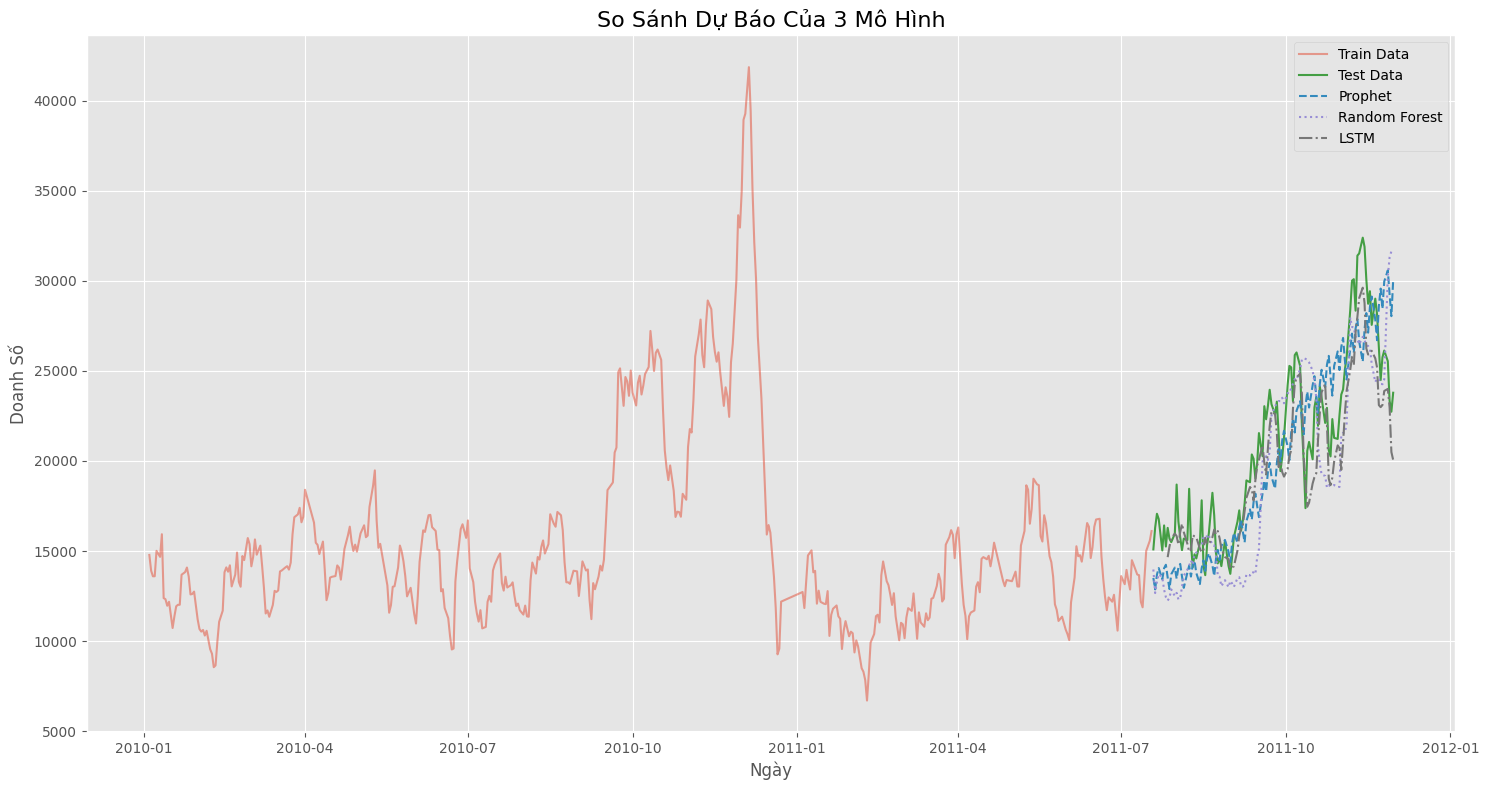

In [ ]:
# Tổng hợp kết quả của các mô hình vào DataFrame
results = pd.DataFrame({
    'Prophet': metrics_prophet,
    'Random Forest': metrics_rf,
    'LSTM': metrics_lstm
}).T

# In bảng kết quả
print("\n=== BẢNG SO SÁNH HIỆU SUẤT CỦA CÁC MÔ HÌNH ===")
print(results)

# ==================== PHẦN 5: VISUALIZATION ====================
# Vẽ biểu đồ so sánh dự báo của 3 mô hình
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], np.expm1(train['y']), label='Train Data', alpha=0.5)
plt.plot(test['ds'], test['y_true'], label='Test Data', color='green', alpha=0.7)

# Vẽ dự báo từ Prophet
plt.plot(test['ds'], test_forecast['yhat'], label='Prophet', linestyle='--')

# Vẽ dự báo từ Random Forest
plt.plot(test['ds'], rf_pred, label='Random Forest', linestyle=':')

# Vẽ dự báo từ LSTM - Adjust the x-axis values for LSTM predictions
# Adjust the x-axis to match the length of lstm_pred
plt.plot(test['ds'][7:], lstm_pred, label='LSTM', linestyle='-.') # Slicing test['ds']


plt.title('So Sánh Dự Báo Của 3 Mô Hình', fontsize=16)
plt.xlabel('Ngày')
plt.ylabel('Doanh Số')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

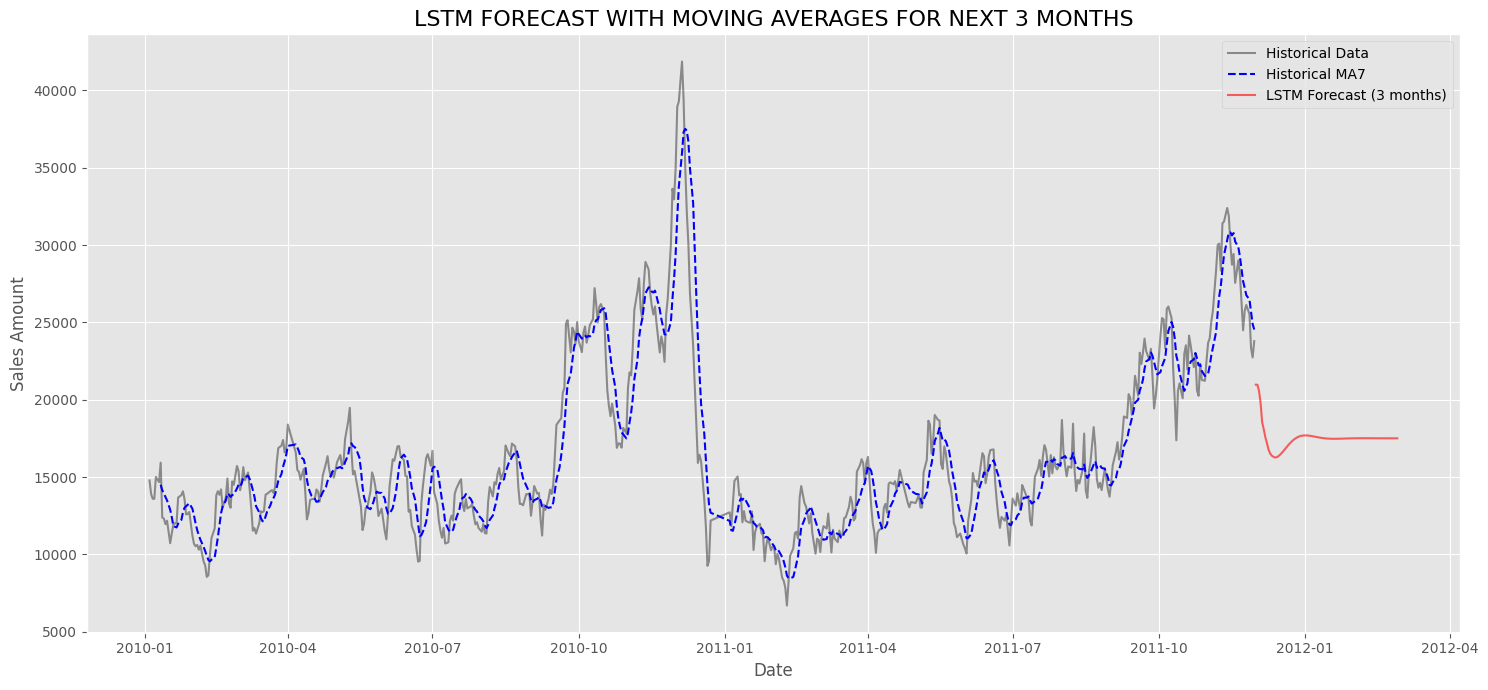

In [ ]:
# ==================== DỰ BÁO CHO N THÁNG TIẾP THEO BẰNG LSTM ====================

def prepare_lstm_forecast_data(model, train_data, test_data, n_months=3):
    """
    Chuẩn bị dữ liệu và thực hiện dự báo bằng LSTM

    Args:
        model: Mô hình LSTM đã huấn luyện
        train_data: Dữ liệu train
        test_data: Dữ liệu test
        n_months: Số tháng cần dự báo
    """
    full_data = pd.concat([train_data, test_data])
    features = ['y', 'day_of_week', 'Month_int', 'is_holiday', 'hour']
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(full_data[features])

    look_back = 7
    n_days = n_months * 30
    last_sequence = scaled_data[-look_back:]
    predictions = []
    dates = []
    last_date = full_data['ds'].iloc[-1]

    for i in range(n_days):
        x_input = last_sequence[-look_back:].reshape(1, look_back, len(features))
        y_pred = model.predict(x_input, verbose=0)
        new_pred = np.zeros((1, len(features)))
        new_pred[0, 0] = y_pred[0, 0]

        for j in range(1, len(features)):
            new_pred[0, j] = last_sequence[-1, j]

        last_sequence = np.vstack([last_sequence, new_pred])
        new_date = last_date + pd.Timedelta(days=i+1)
        dates.append(new_date)
        predictions.append(new_pred[0, 0])

    predictions = np.array(predictions).reshape(-1, 1)
    dummy_features = np.zeros((len(predictions), len(features)-1))
    predictions = np.hstack([predictions, dummy_features])
    predictions = scaler.inverse_transform(predictions)[:, 0]

    forecast_df = pd.DataFrame({
        'Date': dates,
        'Forecast': np.expm1(predictions)
    })

    return forecast_df

# Thực hiện dự báo cho 3 tháng tiếp theo
n_months = 3
forecast_results = prepare_lstm_forecast_data(lstm_model, train, test, n_months)

# ==================== TÍNH TRUNG BÌNH ĐỘNG ====================
historical_df = pd.DataFrame({
    'Date': data['ds'],
    'Sales': np.expm1(data['y'])
})
historical_df['MA7'] = historical_df['Sales'].rolling(window=7).mean()
historical_df['MA30'] = historical_df['Sales'].rolling(window=30).mean()

forecast_results['MA7'] = forecast_results['Forecast'].rolling(window=7).mean()
forecast_results['MA30'] = forecast_results['Forecast'].rolling(window=30).mean()

# ==================== VẼ BIỂU ĐỒ ====================
plt.figure(figsize=(15, 7))

# Dữ liệu lịch sử và MA
plt.plot(historical_df['Date'], historical_df['Sales'], label='Historical Data', color='black', alpha=0.4)
plt.plot(historical_df['Date'], historical_df['MA7'], label='Historical MA7', color='blue', linestyle='--')
# plt.plot(historical_df['Date'], historical_df['MA30'], label='Historical MA30', color='blue', linestyle=':')

# Dự báo và MA
plt.plot(forecast_results['Date'], forecast_results['Forecast'],
         label=f'LSTM Forecast ({n_months} months)', color='red', alpha=0.6)
# plt.plot(forecast_results['Date'], forecast_results['MA7'], label='Forecast MA7', color='red', linestyle='--')
# plt.plot(forecast_results['Date'], forecast_results['MA30'], label='Forecast MA30', color='red', linestyle=':')

# Cấu hình đồ họa
plt.title(f'LSTM FORECAST WITH MOVING AVERAGES FOR NEXT {n_months} MONTHS', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
